### DATASET: Infectious SocioPatterns

This first dataset contains the daily cumulated networks represented in the Infectious SocioPatterns visualization. The downloadable package contains one gml (Graph Modelling Language) file for each of the sixty-nine covered days. The nodes represent visitors of the Science Gallery while the edges represent close-range face-to-face proximity between the concerned persons. The weights associated with the edges are the number of 20 seconds intervals during which close-range face-to-face proximity has been detected. Note that the same node ids are used in successive days for simplicity, but they naturally correspond to different visitors as each visitor was present only on one day.

For more details on the data collection and processing please see our paper What’s in a crowd? Analysis of face-to-face behavioral networks.

In [1]:
import networkx          as nx
import numpy             as np
import xarray            as xr
import matplotlib.pyplot as plt 
import brainconn         as bc
import glob

from   net.layerwise     import *
from   tqdm              import tqdm

In [2]:
def _get_adj_day(day):
    assert day<69, "The day number should be between 0 and 68."
    # Get sorted file names
    _GML_FNAMES = np.sort( glob.glob('data-sets/infectious/*.gml') )
    # Read gml with networkx
    A           = nx.adjacency_matrix( nx.read_gml(_GML_FNAMES[t],label='id') ).toarray()
    np.fill_diagonal(A,1)
    return A

In [3]:
days = np.arange(0, 69, dtype=int)

In [4]:
Mig, Mbc = [], []
for t in tqdm( days ):
    A  = _get_adj_day(t)
    Mig += [compute_network_partition(A[...,None,None], kw_leiden={'n_iterations':10}, verbose=False, backend='igraph', n_jobs=1)[1]]
    Mbc += [bc.modularity.modularity_finetune_und(A)[1]]
Mig = np.squeeze(Mig)
Mbc = np.squeeze(Mbc)

100%|██████████| 69/69 [00:11<00:00,  5.95it/s]


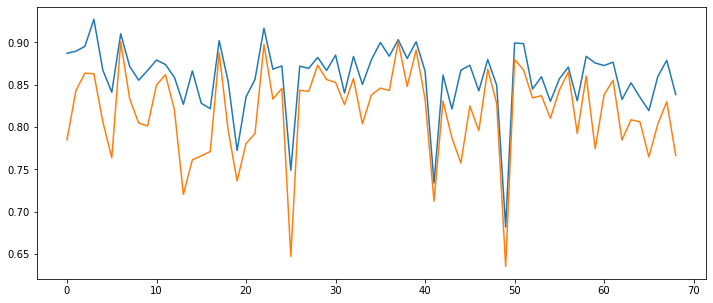

In [5]:
plt.figure(figsize=(12,5))
plt.plot(days, Mig)
plt.plot(days, Mbc)